# 2-D Ising Model

We will investigate the 2-d Ising model with Monte Carlo methods. Since there are many internal iterations, it is much faster to run in `C++` with `swig`. 

### Compile with swig

In [1]:
! swig -c++ -python swig/ising.i
! python swig/setup_ising.py build_ext --inplace

running build_ext
building '_ising' extension
creating build
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/swig
gcc -pthread -B /apps/share64/debian7/anaconda/anaconda-6/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/apps/share64/debian7/anaconda/anaconda-6/include/python3.7m -c swig/ising_wrap.cxx -o build/temp.linux-x86_64-3.7/swig/ising_wrap.o -I./ -std=c++11 -O3
cc1plus: warning: command line option ‘-Wstrict-prototypes’ is valid for C/ObjC but not for C++ [enabled by default]
swig/ising_wrap.cxx: In function ‘PyObject* PyInit__ising()’:
swig/ising_wrap.cxx:8826:21: warning: variable ‘md’ set but not used [-Wunused-but-set-variable]
gcc -pthread -B /apps/share64/debian7/anaconda/anaconda-6/compiler_compat -Wl,--sysroot=/ -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/apps/share64/debian7/anaconda/anaconda-6/include/python3.7m -c ising.cpp -o build/temp.linux-x86_64-3.7/

### Import from swig

In [2]:
import sys
import os
sys.path.append( os.path.abspath("swig") )
import ising
import numpy as np
import matplotlib.pyplot as plt

### Initialize the system

In [3]:
L = 10
J = 1.0
N = 100
T = 1.
H = 0.
MCSteps = 1000


### Run the simulations for various temperatures


Also plot the average magnetization as a function of the MC step. 

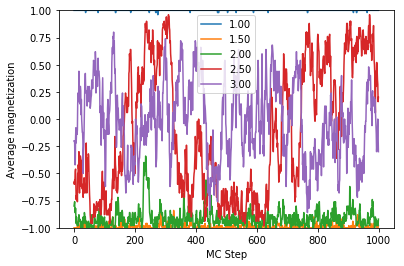

In [4]:
eAvgVals = []
mAvgVals = []
Tvals = np.linspace(1,3,5)
for T in Tvals:
    i = ising.Ising(J, L, N, T, H)
    i.run(MCSteps)
    mvals = i.get_mvals()
    plt.plot(mvals, label="%3.2f" % (T))
    eAvgVals.append( i.get_eAvg() )
    mAvgVals.append( i.get_mAvg() )

plt.legend()
plt.ylim(-1,1)
plt.xlabel("MC Step")
plt.ylabel("Average magnetization")
plt.show()

### Plot average magnetization versus temperature

Text(0, 0.5, 'Average Magnetization')

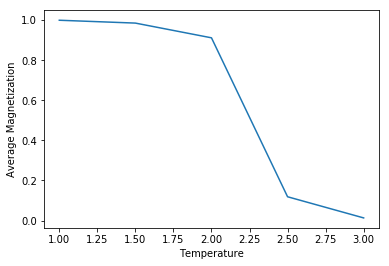

In [5]:
plt.plot(Tvals, np.abs(mAvgVals))
plt.xlabel("Temperature")
plt.ylabel("Average Magnetization")